# Probability distributions & meteor shower gazing


**Our goals for today:**
- Discuss some key statistics topics: samples versus populations and empirical versus theorectical distributions
- Simulate a head/tail coin toss and well drilling i.e. Binomial distribution
- Simulate meteors entering Earth's atmosphere i.e. Poisson distribution
- Simulate geomagnetic polarity reversals i.e. Gamma distribution


## Setup

Run this cell as it is to setup your environment.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as scipy
import math
import time

#pd.options.display.max_rows = 50

## Probability distribution functions

Random events can be described by the probabilites of them occuring. We can estimate the probabilities of events if we know the **probability distribution function (PDF)** that they follow. These are used extensively in many fields including economics, engineering, and the Earth, ocean, and marine sciences. We can use PDFs to determine if an event really is random, or is controlled by some process.

## Flipping a coin

Think about a coin flip. 

<font color=darkred>**Discussion question**</font> What values can a coin flip take?

<font color=green>**Answer**</font> Heads or Tails.

<font color=darkred>**Discussion question**</font> What are the odds of a fair coin flip?

<font color=green>**Answer**</font> 50/50, or 1 in 2, or 50%, depending on how you write it.

<font color=darkred>**Discussion question**</font> If a friend flips a coin 10 times and gets **10 heads**, are they cheating?

<font color=green>**Answer**</font> Maybe, but it's not impossible


## Flipping a coin

Let's code up flipping a coin. Since the result can take the value of **heads or tails**, we need a way to represent this. Let's use **1 for heads, 0 for tails**. Therefore our choices, represented as a **list** are `[0, 1]`.

We can use `np.random.choice` to randomly select a value from a given **list** of choices.

a coin 10 times using ```np.random.choice([0, 1])```. How many times will be get heads? **1 is heads, 0 is tails**. Let's use a for loop and get Python to simulate such a coin flip scenario for us.

<font color=goldenrod>**Code for you to write**</font>

- Use `np.random.choice` and pass the list of `[0,1]` as an argument to simulate 1 coin flip.
- Re-run this a few times to see the value change.

In [2]:
# Psuedo random
np.random.choice([0,1])

np.int64(0)

## For loops

We can't rerun this forever. Instead, we use a **for loop** to repeat an action a **fixed number of times**.

### Anatomy of a function
- a `for` statement
- a `variable` name that takes on the value in the loop
- an `in` statement
- a `range` to iterate/loop over
- a `:` to end the `for` statement
- an indentation
- some code to run

for **variable** in **range:**
    
    do something

The `for` loop will run through the `range` sequentially, assigning each value to the `variable`, and then it will run the code. For example, using `range(0,10)` will cause the code to loop through 10 times. The `for` loop will end at the end of `range`.

In [3]:
print(np.arange(0,5))
print (range(0,5))
print(type(range(0,5)))

[0 1 2 3 4]
range(0, 5)
<class 'range'>


In [4]:
for loop_number in range(0,5):
    print ("loop number:",loop_number)

loop number: 0
loop number: 1
loop number: 2
loop number: 3
loop number: 4


In [5]:
np.arange?

Docstring:
arange([start,] stop[, step,], dtype=None, *, device=None, like=None)

Return evenly spaced values within a given interval.

``arange`` can be called with a varying number of positional arguments:

* ``arange(stop)``: Values are generated within the half-open interval
  ``[0, stop)`` (in other words, the interval including `start` but
  excluding `stop`).
* ``arange(start, stop)``: Values are generated within the half-open
  interval ``[start, stop)``.
* ``arange(start, stop, step)`` Values are generated within the half-open
  interval ``[start, stop)``, with spacing between values given by
  ``step``.

For integer arguments the function is roughly equivalent to the Python
built-in :py:class:`range`, but returns an ndarray rather than a ``range``
instance.

When using a non-integer step, such as 0.1, it is often better to use
`numpy.linspace`.

See the Warning sections below for more information.

Parameters
----------
start : integer or real, optional
    Start of interval.

For ranges, we can use a range object, constructed with `range(start,stop,step)`, or an array of values with `np.arange(start,stop,step)`.

In [6]:
#Range object
print (range(0,5,1))
print(type(range(0,5,1)))

#Numpy array object
print(np.arange(0,5,1))
print(type(np.arange(0,5,1)))

range(0, 5)
<class 'range'>
[0 1 2 3 4]
<class 'numpy.ndarray'>


Let's use a for loop and get Python to simulate such a coin flip scenario for us.

<font color=goldenrod>**_Code for you to write_**</font>

- Create a `for` loop
- call the `variable` flip_number
- use a range of `range(0,10,1)
- within the loop, run use `np.random.choice` to simulate a coin flip
- print the value of that random choice

In [7]:
for flip_number in range(0,10,1):
    print(f'Flip {flip_number+1}: {np.random.choice([0,1])}')

Flip 1: 1
Flip 2: 0
Flip 3: 0
Flip 4: 1
Flip 5: 0
Flip 6: 1
Flip 7: 0
Flip 8: 0
Flip 9: 0
Flip 10: 0


In [8]:
[np.random.choice([0, 1]) for _ in range(10)]

[np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1)]

Now let's record how many times the result was heads. We will make a **list** called `flip_results` and have it be empty to start. Each time we go through the code we will `append` the result to the list:

In [9]:
flip_results = []  #Create empty list

for flip in range(0,10,1):
    flip_result = np.random.choice([0, 1])
    flip_results.append(flip_result)  #Append value to list
    
flip_results    

[np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0)]

We can calculate how many times were heads by taking the sum of the list.

<font color=goldenrod>**_Code for you to write_**</font>

- Use `np.sum` to calculate the number of heads in the list

In [10]:
np.sum(flip_results)/10

np.float64(0.6)

### Nested loops

Sometimes we want to repeat a repeated set of actions. We do this with a `for` loop nested within another `for` loop. 

Now let's flip the coin 10 times and do that 10 times. Each time we flip it, let's record the outcome. Each set of 10 flips, let's record many heads resulted from all 10 flips.

<font color=goldenrod>**_Code for you to write_**</font>
- Use the loop from above
- Add another for loop outside of the first and loop 10 times
- Append the total sum of heads per set of flips to the list `number_heads`
- Print `number_heads`

In [11]:
start_time = time.time()
end_time = time.time()

elapsed_time = end_time - start_time
print(elapsed_time)

1.7881393432617188e-05


In [12]:
np.arange(-0.5,11.5,1.0)

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
       10.5])

Elapsed time = 0.61 seconds
Probability of heads= 0.49853000000000003


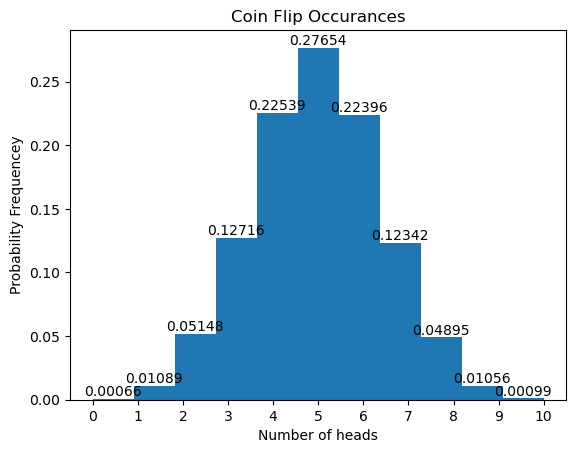

In [13]:
sets = 10000
flips = 10

#Create outer loop of number of tests
number_heads = []
percentage_heads = []
max_heads = 0

start_time = time.time()
for test in range(0,sets,1):

#Create inner loop of number of flips
    flip_results = []  #Create empty list
    for flip in range(0,flips,1):
        flip_result = np.random.choice([0, 1])
        flip_results.append(flip_result)  #Append value to list
    number_heads.append(np.sum(flip_results))
    percentage_heads.append(np.sum(flip_results)/flips)
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Elapsed time = {elapsed_time:.2f} seconds')
number_heads
print(f'Probability of heads= {np.average(percentage_heads)}')
values, bins, bars = plt.hist(number_heads, bins=11, density=True)
plt.title('Coin Flip Occurances')
plt.xticks(range(0,11))
plt.ylabel('Probability Frequencey')
plt.bar_label(bars)
plt.xlabel('Number of heads')
plt.show()

Now we can plot this on a histogram as a **cumulative-density plot**.

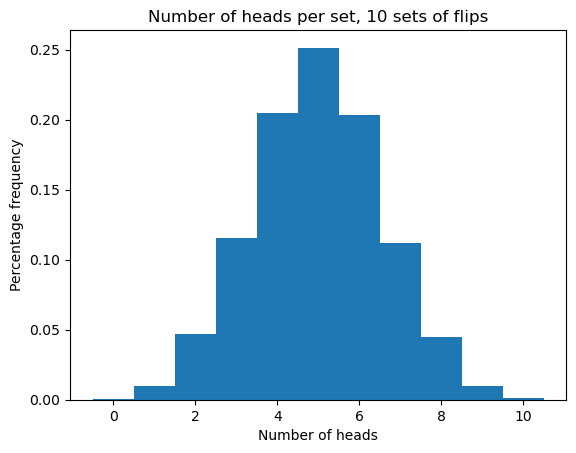

In [14]:
plt.hist(number_heads,bins=np.arange(-0.5,11.5,1.0),density=True)
plt.xlabel('Number of heads')
plt.ylabel('Percentage frequency')
plt.title('Number of heads per set, 10 sets of flips')
plt.show()

<font color=goldenrod>**_Code for you to write_**</font>

Instead of doing 10 coin flips 10 times, do 10 coin flips 1000 times. Plot the histogram of the result.

In [15]:
#Loop
sets = 1000
flips = 10

#Create outer loop of number of tests
number_heads = []
percentage_heads = []
max_heads = 0

start_time = time.time()
for test in range(0,sets,1):

#Create inner loop of number of flips
    flip_results = []  #Create empty list
    for flip in range(0,flips,1):
        flip_result = np.random.choice([0, 1])
        flip_results.append(flip_result)  #Append value to list
    number_heads.append(np.sum(flip_results))
    percentage_heads.append(np.sum(flip_results)/flips)
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Elapsed time = {elapsed_time:.2f} seconds')
number_heads
print(f'Probability of heads= {np.average(percentage_heads)}')

Elapsed time = 0.06 seconds
Probability of heads= 0.4985


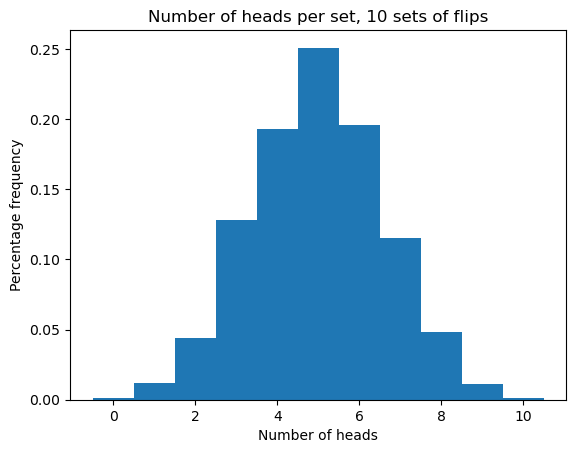

In [16]:
#Histogram
plt.hist(number_heads,bins=np.arange(-0.5,11.5,1.0),density=True)
plt.xlabel('Number of heads')
plt.ylabel('Percentage frequency')
plt.title('Number of heads per set, 10 sets of flips')
plt.show()

## Binomial distribution:

### Theoretical

A relatively straight-forward distribution is the _binomial_ distribution which describes the probability of a particular outcome when there are only two possibilities (yes or no, heads or tails, 1 or 0).   For example, in a coin toss experiment (heads or tails), if we flip the coin  $n$ times, what is the probability of getting $x$ 'heads'?  We assume that the probability $p$ of a head for any given coin toss is 50%; put another way $p$ = 0.5.  

The binomial distribution can be described by an equation: 

$$P=f(x,p,n)= \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}$$

We can look at this kind of distribution by evaluating the probability for getting $x$ 'heads' out of $n$ attempts. We'll code the equation as a function, and calculate the probability $P$ of a particular outcome (e.g., $x$ heads in $n$ attempts). 

Note that for a coin toss, $p$ is 0.5, but other yes/no questions can be investigated as well (e.g., chance of finding a fossil in a sedimentary layer, whether or not a landslide occurs following an earthquake). 

In [17]:
def binomial_probability(x,p,n):
    """
    This function computes the probability of getting x particular outcomes (heads) in n attempts, where p is the 
    probability of a particular outcome (head) for any given attempt (coin toss).
    
    Parameters
    ----------
    x : number of a particular outcome
    p : probability of that outcome in a given attempt
    n : number of attempts
    
    Returns
    ---------
    prob : probability of that number of the given outcome occuring in that number of attempts
    """

    prob = (math.factorial(n)/(math.factorial(x)*math.factorial(n-x)))*(p**(x))*(1.-p)**(n-x)

    return prob

We can use this function to calculate the probability of getting 10 heads ($x=10$) when there are 10 coin tosses ($n=10$) given with the $p$ (probability) of 0.5.  

In [18]:
binomial_probability(x=10,p=0.5,n=10)

0.0009765625

Let's calculate the probability of getting [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10] heads.

<font color=goldenrod>**_Code for you to write_**</font>

- Use `np.arange(start,stop,step)` to create a range of values between 0 and 10, inclusive

In [19]:
head_numbers = np.arange(0,11,1)
head_numbers

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

<font color=goldenrod>**_Code for you to write_**</font>

Complete the call of the function below to **thoeretically** calculate the probabalities for each value in the variable `head_numbers`

In [20]:
prob_heads = 0.5
n_flips = 10
probabilities = []

for head_number in head_numbers:
    probabilities.append(binomial_probability(head_number,prob_heads,n_flips))
    print(head_number, probabilities)

probabilities

0 [np.float64(0.0009765625)]
1 [np.float64(0.0009765625), np.float64(0.009765625)]
2 [np.float64(0.0009765625), np.float64(0.009765625), np.float64(0.0439453125)]
3 [np.float64(0.0009765625), np.float64(0.009765625), np.float64(0.0439453125), np.float64(0.1171875)]
4 [np.float64(0.0009765625), np.float64(0.009765625), np.float64(0.0439453125), np.float64(0.1171875), np.float64(0.205078125)]
5 [np.float64(0.0009765625), np.float64(0.009765625), np.float64(0.0439453125), np.float64(0.1171875), np.float64(0.205078125), np.float64(0.24609375)]
6 [np.float64(0.0009765625), np.float64(0.009765625), np.float64(0.0439453125), np.float64(0.1171875), np.float64(0.205078125), np.float64(0.24609375), np.float64(0.205078125)]
7 [np.float64(0.0009765625), np.float64(0.009765625), np.float64(0.0439453125), np.float64(0.1171875), np.float64(0.205078125), np.float64(0.24609375), np.float64(0.205078125), np.float64(0.1171875)]
8 [np.float64(0.0009765625), np.float64(0.009765625), np.float64(0.0439453125

[np.float64(0.0009765625),
 np.float64(0.009765625),
 np.float64(0.0439453125),
 np.float64(0.1171875),
 np.float64(0.205078125),
 np.float64(0.24609375),
 np.float64(0.205078125),
 np.float64(0.1171875),
 np.float64(0.0439453125),
 np.float64(0.009765625),
 np.float64(0.0009765625)]

Plot the empirical and theoretical number of heads against the probability of each as a cumulative density plot. 

<font color=goldenrod>**_Code for you to write_**</font>

- Plot a histogram of the empirical data in `number_heads` (using ```plt.hist()``` with ```density=True```). Use `bins=np.arange(-0.5,11.5,1.0)` to centre the histogram bars
- Plot the theoretical results in `head_numbers probabilities` (using ```plt.plot()```),
- Add xlabels, ylabels, and a title

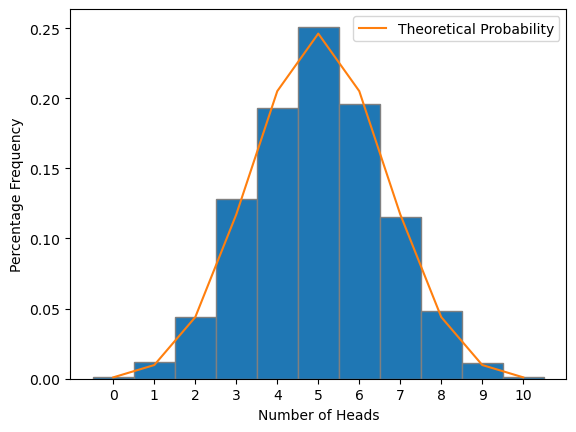

In [21]:
plt.hist(number_heads,bins=np.arange(-0.5,11.5,1.0), density=True,edgecolor='grey')
plt.plot(head_numbers,probabilities, label='Theoretical Probability')
plt.legend()
plt.xlabel('Number of Heads')
plt.ylabel('Percentage Frequency')
plt.xticks(range(0,11,1))
# plt.grid()
plt.show()

Hopefully what we should see is that number of coin flips from our random samples matches the theoritical probability distribution pretty well. The more flip experiments we numerically take, the better it should match.

### Empirical

The type of sampling we were doing above where we were flipping coins is called a **Monte Carlo simulation**. We can use simulate data from all sorts of distributions. Let's keep focusing on the binomial distribution using the ```np.random.binomial``` function.

In [22]:
np.random.binomial?

Signature: np.random.binomial(n, p, size=None)
Docstring:
binomial(n, p, size=None)

Draw samples from a binomial distribution.

Samples are drawn from a binomial distribution with specified
parameters, n trials and p probability of success where
n an integer >= 0 and p is in the interval [0,1]. (n may be
input as a float, but it is truncated to an integer in use)

.. note::
    New code should use the `~numpy.random.Generator.binomial`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
n : int or array_like of ints
    Parameter of the distribution, >= 0. Floats are also accepted,
    but they will be truncated to integers.
p : float or array_like of floats
    Parameter of the distribution, >= 0 and <=1.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned 

`np.random.binomial( )` requires 2 parameters, $n$ and $p$, with an optional keyword argument `size` (if `size` is not specified, it returns a single trial). We could have used this function earlier to get the number of heads that were flipped, but the way we did it also worked.

Let's follow the example that is given in the `np.random.binomial( )` docstring.

A company drills **9 wild-cat oil exploration wells** (high risk drilling in unproven areas), each with an estimated **probability of success of 0.1**. All nine wells fail. What is the probability of that happening? 

*Note that success in this context means that liquid hydocarbons came out of the well. In reality, you may not consider this a success given that the result is that more hydrocarbons will be combusted as a result, leading to higher atmospheric carbon dioxide levels and associated global warming.*

<font color=goldenrod>**_Code for you to write_**</font>
- Use `np.random.binomial` to calculate the number of successful wells
- Use number of observations, n = 9
- Use probabilty, p = 0.1
- Use number of tests, t = 100

In [23]:
np.random.binomial(n=9, p=0.1, size=100)

array([3, 3, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 2, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 3, 1, 1, 3, 0, 0, 1, 1, 0, 2, 1, 1, 0, 0,
       2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1, 3, 1, 0, 0,
       0, 2, 1, 1, 1, 1, 1, 2, 3, 0, 2, 0])

We want to know how many times the number of successful wells = 0. Use the boolean expression `== 0` and our output from `np.random.binomial` to determine this

In [24]:
np.random.binomial(9, 0.1, 100) == 0

array([ True,  True, False,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True,  True, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False, False,  True, False,  True, False, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True, False, False, False, False,  True, False, False, False,
        True,  True,  True,  True, False, False, False,  True, False,
       False])

We can `sum` this to count the number of `True` values, i.e. where the number of successful wells = 0.

In [25]:
sum(np.random.binomial(9, 0.1, 100) == 0)

np.int64(37)

Now we divide this value by the number of tests (100 in this case) to determine the probability of this outcome.

In [26]:
sum(np.random.binomial(9, 0.1, 100) == 0)/100

np.float64(0.37)

We can write a function that uses this process to simulate fraction of times that there no successful wells for a given number of wells, a given probability and a given number of simulations.

<font color=goldenrod>**_Code for you to write_**</font>
- Write a function `wildcat_failure_rate`
- Take as arguments `n_wells`,`prob`, and `n_simulations`
- Write a docstring
- Use `np.random.binomial` and these *n*, *p*, and *t*
- Calculate the `failure_likelihood` of all 9 wells failing bything the sum and dividing by `t`
- return `failure_likelihood`

In [27]:
def wildcat_failure_rate(n_wells, prob, n_simulations, threshold=0):
    '''
    This function simulates the fraction of times that there were no successful wells for a given number of wells. 
    
    Parameters
    ---------
    n_wells(int): number of 

    prob(float): probability of successful wells.

    n_simulations(int): number of simulations 

    threshold(bool): threshold for what is considered the number of failures. 

    Returns
    -------
    out: float
        Returns the likelihood of all wells failing. by using np.random.binomial to return an array of n_simulations
    '''
    return sum(np.random.binomial(n_wells, prob, n_simulations) <= threshold)/n_simulations




<font color=goldenrod>**Put the `wildcat_failure_rate` function to use**</font>

- Use the function to simulate the failure rate for the above scenario (9 wells drilled, 0.1 probability of success for each well) and do it for 10 simulations, n=9, p=0.1, t=10

In [28]:
# Misunderstood the directions and ran simulations of simulations
sim_count = 10
failure_rate = []
for sim in range(0,sim_count):
    print(sim_count)
    rate = wildcat_failure_rate(9,.1,10)
    failure_rate.append(rate)
print(sum(failure_rate)/sim_count)

10
10
10
10
10
10
10
10
10
10
0.44000000000000006


<font color=goldenrod>**Put the `wildcat_failure_rate` function to use**</font>

- Use the function to simulate the failure rate for the same scenario for 1000 simulations, n=9, p=0.1, t=100

In [29]:
sim_count = 1000
failure_rate = []
for sim in range(0,sim_count):
    rate = wildcat_failure_rate(9,.1,10)
    failure_rate.append(rate)
print(f'The expected failure rate for {sim_count} simulations is {(sum(failure_rate)/sim_count):.5f}')

The expected failure rate for 1000 simulations is 0.39030


<font color=goldenrod>**Put the `wildcat_failure_rate` function to use**</font>

- Use the function to simulate the failure rate for 100000 simulations. n=9, p=0.1, t=100000

In [30]:
sim_count = 1000
failure_rate = []
for sim in range(0,sim_count):
    rate = wildcat_failure_rate(9,.1,100000)
    failure_rate.append(rate)
print(f'The expected failure rate for {sim_count} simulations is {(sum(failure_rate)/sim_count):.5f}')

The expected failure rate for 1000 simulations is 0.38745


### Theoretical probability

In the examples above we are simulating the result. Instead we could use the `binomial_probability` distribution to calculate the probability. In `binomial_probability`, it took the desired number of events (i.e. number of successful wells), probability, and, number of observations (number of wells).

<font color=goldenrod>**Code for you to write**</font>
- Use the `binomial_probability` with x=0, p=0.1, and n=9 to calculate the theoretical probability of the wildcat drilling example. 

In [31]:
binomial_probability(x=0,p=0.1,n=9)

0.3874204890000001

**<font color=darkred> Discussion question</font>** How well does the theoretical `binomial_probability` match the empirical (*Monte Carlo*) wildcat_failure rates? 

**<font color=blue>Answer:</font>** It matches very well in this scenario.

# Earth's geomagnetic polarity timescale and the Gamma distribution

Earth’s magnetic field varies with time. The most dramatic aspect of this variation is that it reverses its polarity. The field structure in both the normal and reversed states is dipolar (like a bar magnetic), but the pole locations are switched. The timescale that it takes for the field to reverse is relatively short (a few thousand years) compared to the time that it is typically in a given polarity.

<img src="./figures/normal_reversed.png" width = 600>

> Source: Earth’s Dynamic Systems
(10th Edition) Hamblin, W. K. and Christiansen, E. H.


You have now dealt in detail with data that is developed by research vessels towing a 
magnetometer measure the marine magnetic anomalies. As you saw, the history of reversals is recorded by the oceanic crust as it forms at the ridge with both sides of the ridge record this pattern of reversals leading to symmetry about the ridge. Both the marine magnetic anomalies and records of the magnetic field on land in sedimentary rocks and lava flows have led to the development of the geomagnetic polarity time scale (GPTS). 

<img src="./figures/GPTS.png" width = 600>

> Source: Gee and Kent (2007) "Source of Oceanic Magnetic Anomalies and the Geomagnetic Polarity Timescale"

## Geomagnetic reversals and the Poisson distribution

Geomagnetic reversals are often interpretted to behave like a Poisson process. A Poisson process meets the following criteria:

- Events are independent of each other.
- The average rate (events per time period) is constant.
- Two events cannot occur at the same time.

Import the geomagnetic polarity time scale data for the past 40 million years as a pandas dataframe. The file has a start and end date for each polarity zone along with its polarity.

<font color=goldenrod>**_Code for you to write_**</font>
- Read in `GPTS.csv` which is in the `data/` directory

In [32]:
GPTS = pd.read_csv('data/GPTS.csv')
GPTS

,Start_Myr,End_Myr,Polarity
0,0.780,0.000,normal
1,0.990,0.780,reverse
2,1.070,0.990,normal
3,1.201,1.070,reverse
4,1.211,1.201,normal
...,...,...,...
155,38.426,38.113,reverse
156,39.552,38.426,normal
157,39.631,39.552,reverse
158,40.130,39.631,normal


Let's use ```plt.fill()``` to make a plot that looks like the geomagnetic polarity time scale that is shown above. To make such a plot, let's make a list of reversal times when the field switched from normal (1) to reverse (-1) and an accompanying time list that we can then plot:

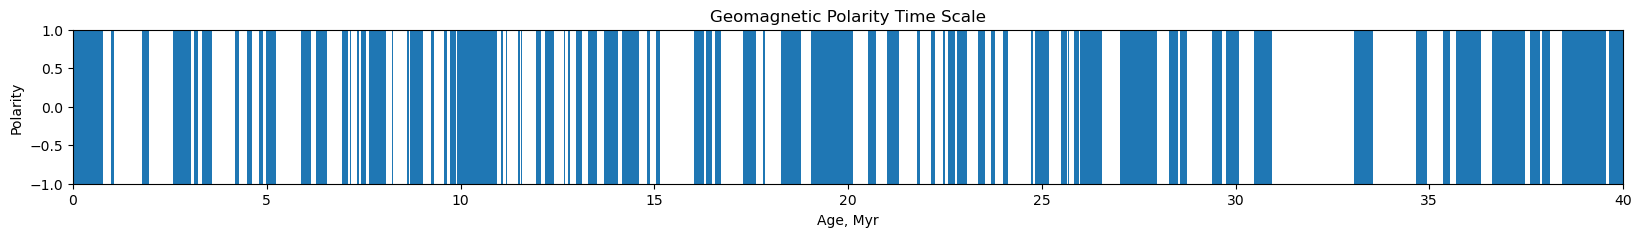

In [33]:
polarity_code = []
time_list = []

for i in GPTS.index:
    if GPTS['Polarity'][i] == 'normal':
        polarity_code.append(-1)
        polarity_code.append(1)
        time_list.append(GPTS['End_Myr'][i])
        time_list.append(GPTS['End_Myr'][i])
    if GPTS['Polarity'][i] == 'reverse':
        polarity_code.append(1)
        polarity_code.append(-1)
        time_list.append(GPTS['End_Myr'][i])
        time_list.append(GPTS['End_Myr'][i])
        
plt.figure(1,(20,2))
plt.fill(time_list,polarity_code)
plt.xlabel('Age, Myr')
plt.ylabel('Polarity')
plt.xlim(0,40)
plt.ylim(-1,1)
plt.title('Geomagnetic Polarity Time Scale')
plt.show()

We need to know the average duration of a geomagnetic polarity zone. We head the start time and end time.

In [34]:
GPTS['Start_Myr'].head()

0    0.780
1    0.990
2    1.070
3    1.201
4    1.211
Name: Start_Myr, dtype: float64

In [35]:
GPTS['End_Myr'].head()

0    0.000
1    0.780
2    0.990
3    1.070
4    1.201
Name: End_Myr, dtype: float64

<font color=goldenrod>**_Code for you to write_**</font>
- Make a new column named `Zone_dur` in the Dataframe for polarity zone **duration where you subtract the end date from the start date.**
- use ```np.mean()``` to calculate the mean duration
- Save this as a variable named `average_polarity_zone_duration` with the mean polarity duration.

In [36]:
GPTS['Zone_dur']=  GPTS['Start_Myr'] - GPTS['End_Myr']
GPTS['Zone_dur'].units= 'Myr'
GPTS

,Start_Myr,End_Myr,Polarity,Zone_dur
0,0.780,0.000,normal,0.780
1,0.990,0.780,reverse,0.210
2,1.070,0.990,normal,0.080
3,1.201,1.070,reverse,0.131
4,1.211,1.201,normal,0.010
...,...,...,...,...
155,38.426,38.113,reverse,0.313
156,39.552,38.426,normal,1.126
157,39.631,39.552,reverse,0.079
158,40.130,39.631,normal,0.499


In [37]:
average_polarity_zone_duration = np.mean(GPTS['Zone_dur'])
print(f'{average_polarity_zone_duration:.3f} {GPTS['Zone_dur'].units}')

0.258 Myr


The current normal polarity zone has been going on for 0.78 Myr which is about 3 times longer than the average duration (0.26 Myr).

### Empirical distribution

Let's plot the empirical distribution (i.e. it is the observed data). 

<font color=goldenrod>**_Code for you to write_**</font>
- Plot a histogram of the polarity zone duration
- Use `density=True`
- Add x and y labels
- Add a title

In [38]:
np.arange(0,1,.25)

array([0.  , 0.25, 0.5 , 0.75])

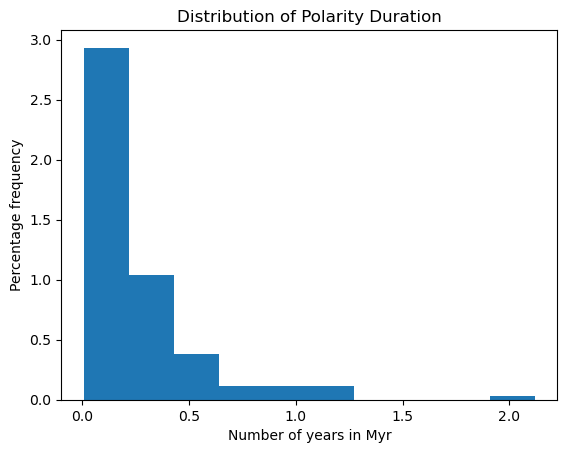

In [50]:
plt.hist(GPTS['Zone_dur'], density=True)
plt.title('Distribution of Polarity Duration')
plt.xlabel(f"Number of years in {GPTS['Zone_dur'].units}")
plt.ylabel('Percentage frequency')
plt.show()

## Can we describe polarity zone duration with a theoretical distribution?

### Gamma distribution:

In class, we discussed the binomial distribution and the Poisson distribution. Another related distribution is the **Gamma distribution**. The **Gamma distribution** is the probability of a given waiting time between Poisson-distributed events (that is an event that randomly occurs but for which is there is an average time period between the events).

The Gamma distribution gives the probability of a waiting time between Poisson distributed events. For those of you that will appreciate the theoretical basis for this function, here it is below. But you will get a better sense of it by putting it into action:

#### Theoretical

Consider the distribution function $D(x)$ of waiting times until the $h$th Poisson event given a Poisson distribution with a rate of change $\lambda$,

$$ D(x) = P (X \le x) = 1 - P(X > x) = 1-\sum_{k=0}^{h-1}\frac{(\lambda x)^{k}e^{-\lambda x}}{k!} = 1-e^{-\lambda x}\sum_{k=0}^{h-1}\frac{(\lambda x)^{k}}{k!} = 1-\frac{\Gamma(h,x\lambda) }{\Gamma (h)}$$ 

where $\Gamma (x) = (x-1)!$ is a complete gamma function and $\Gamma (n,x) = (n-1)! e^{-x}\sum_{k=0}^{n-1}\frac{x^{k}}{k!}$ an incomplete gamma function. The corresponding probability function $P(x)$ of waiting times until the $h$th Poisson event is then obtained by differentiating  $D(x)$,

$$ P(x) = D'(x) = \frac{\lambda (\lambda x)^{h-1}}{(h-1)!}e^{-\lambda x} $$

Now let $\alpha=h$ (not necessarily an integer) and define $\theta=1/\lambda$ to be the time between changes. Then the above equation can be written

$$ P(x) = \frac{x^{\alpha-1}e^{-x/\theta}}{\Gamma (\alpha) \theta^{\alpha}} $$

which is the probability of a duration time $x$ between events.

$\theta$ is the expected time between reversals and we will follow McFadden (1984) and define $\theta = \mu / \alpha$ where $\mu$ is the average chron duration. A value for $\alpha$ greater than one can be interpreted either as an artefact linked to some short intervals missing in the GPTS or to some short term memory within the dynamo that would inhibit a second reversal just after a first one has occurred. McFadden (1984) use a value for $\alpha$ of 1.2.

<img src="./figures/alpha_greater_one.png" width = 600>

> Source: McFadden (1984) "Statistical Tools for the Analysis of Geomagnetic Reversal Sequence"

In [51]:
from scipy.special import gamma
def gamma_probability(x,mu,alpha):
    """
    This function computes the probability waiting x time between poisson events (wuch as polarity change), 
    given theta the expected time between changes and alpha the shape parameter for the gamma distribution
    
    Parameters
    ----------
    x : the wait time use probability is being investigated
    mu : average polarity zone duration
    alpha : the shape parameter for the gamma distribution (1.2 for the GPTS according to McFadden (1984))
    
    Returns
    -------
    prob : probability of wait time x
    """
    
    theta = mu/alpha
    prob = (x**(alpha - 1) * np.exp(-1*x/theta)) / (gamma(alpha)* theta**alpha)
    
    return prob

Calculate the probability of observing a polarity zone for each value in a range of wait times 

**Plot the theoretical gamma probability in comparison to the actual distribution (1 point)**

<font color=goldenrod>**_Code for you to write_**</font>
- Create an empty list called `polarity_probability`
- Use `gamma_probability()` to calculate the probabilities for a range of `wait` times
- Calculate wait times between 0 and 3 using `np.arange(0.0,3.0,0.1)` 
- Use the observed `average_polarity_zone_duration`
- Following McFadden (1984), **use an alpha value of 1.2.**
- Append the probabilty of each wait time to `polarity_probability`

```np.arange(0.0,3.0,0.1)```.Then plot the resulting curve on top of the polarity zone duration histogram. Make sure to label the plotted lines, put on a legend and label the axis. Following McFadden (1984), **use an alpha value of 1.2.**

In [55]:
polarity_probability = []
wait_times = 10
for wait_time in np.arange(0.0,3.0,0.1):
    polarity_probability.append(gamma_probability(wait_time, average_polarity_zone_duration, 1.2))


Add this theoretical distribution to the histogram

<font color=goldenrod>**_Code for you to write_**</font>
- Repeat your histogram from above
- Plot `wait` against `polarity_probability` on top

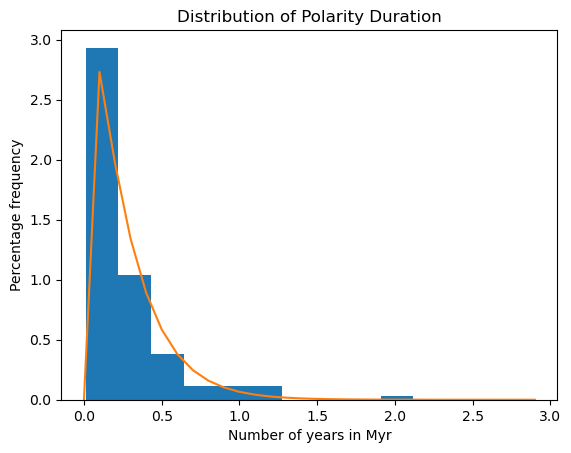

In [57]:
plt.hist(GPTS['Zone_dur'], density=True, label='observed')
plt.plot(np.arange(0.0,3.0,0.1), polarity_probability)
plt.title('Distribution of Polarity Duration')
plt.xlabel(f"Number of years in {GPTS['Zone_dur'].units}")
plt.ylabel('Percentage frequency')
plt.show()

#### Empirical and simulated

The observed GPTS gives us one realization of an empirical distribution. We can use the function `np.random.gamma` to simulate additional empirical distributions.

In [58]:
help(np.random.gamma)

Help on method gamma in module numpy.random:

gamma(shape, scale=1.0, size=None) method of numpy.random.mtrand.RandomState instance
    gamma(shape, scale=1.0, size=None)

    Draw samples from a Gamma distribution.

    Samples are drawn from a Gamma distribution with specified parameters,
    `shape` (sometimes designated "k") and `scale` (sometimes designated
    "theta"), where both parameters are > 0.

    .. note::
        New code should use the `~numpy.random.Generator.gamma`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.

    Parameters
    ----------
    shape : float or array_like of floats
        The shape of the gamma distribution. Must be non-negative.
    scale : float or array_like of floats, optional
        The scale of the gamma distribution. Must be non-negative.
        Default is equal to 1.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``

### Simulating an empirical dataset

Use the `np.random.gamma` function to simulate polarity zones

`np.random.gamma( )`  has 2 specified parameters: `shape` (sometimes designated "$\alpha$") and `scale` (sometimes designated "$\theta$"), and an optional keyword argument `size` (if `size` is not specified, it returns a single trial). Each call to `np.random.gamma( )` returns a chron duration pulled from the gamma distribution. So to get random chron lengths use ```np.random.gamma(shape, scale=1.0, size=None)```.

<font color=goldenrod>**_Code for you to write_**</font>
 
- Use `np.random.gamma( )` to simulate a reversal timescale like in the data
- shape = 1.2 (the alpha we used before)
- scale = average_polarity_zone_duration/1.2
- size = number of polarity zones (so we get random simulated data that is the same length as our original data set)

In [68]:
shape = 1.2
scale = average_polarity_zone_duration/1.2
size = len(GPTS['Zone_dur'])
sim_revs = np.random.gamma(shape, scale, size)

Add a histogram of the simulated data to your existing histogram

<font color=goldenrod>**_Code for you to write_**</font>
- Plot `sim_revs` as a histogram

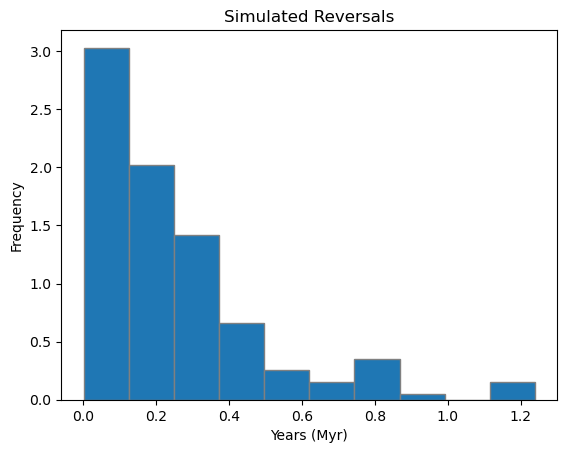

In [69]:
plt.hist(sim_revs, density=True, edgecolor='grey')
plt.title('Simulated Reversals')
plt.xlabel('Years (Myr)')
plt.ylabel('Frequency') 
plt.show()

### Will the field reverse soon?!
But what we _really_ would like to know is how likely is it that a polarity reversal will happen soon. The current chron has been going on for 0.78 Myr. To find the probability that a reversal will happen in the next **10,000 years** we need to find that probability of a chron that is longer than 0.78 Myr but shorter than 0.79 Myr. 
$$P (0.78 \le X \le 0.79) = P(X \le 0.79) - P(X \le 0.78) = (1 - P(0.79)) - (1 - P(0.78))$$

We can  find the probabilty of a chron that is 0.79 Myr using the `gamma_probability` function

In [70]:
gamma_probability(0.79,average_polarity_zone_duration,1.2)

np.float64(0.16645539414792532)

We want the opposite of this, so 1-the probability

In [71]:
1-gamma_probability(0.79,average_polarity_zone_duration,1.2)

np.float64(0.8335446058520747)

<font color=goldenrod>**_Code for you to write_**</font>
- Find the opposite probabilty of a chron that is **0.78 Myr** using the `gamma_probability` function

In [72]:
1-gamma_probability(0.78,average_polarity_zone_duration,1.2)

np.float64(0.8260588327789293)

Now we want opposite probability of a chron that is greater than 0.78 and less than 0.79 Myr, which would be the difference of the two opposite probabilities.

<font color=goldenrod>**_Code for you to write_**</font>
- Calculate the probabilty of a chron that is greater than 0.78 and less than 0.79 Myr.

In [84]:
P_rev_soon = 1-gamma_probability(0.80,average_polarity_zone_duration,1.2)-(1-gamma_probability(0.79,average_polarity_zone_duration,1.2))
P_rev_soon

np.float64(0.0071687185935882525)

In [85]:
P_rev_soon = (1-gamma_probability(0.79,average_polarity_zone_duration,1.2))-(1-gamma_probability(0.78,average_polarity_zone_duration,1.2))
P_rev_soon

np.float64(0.007485773073145352)

In [86]:
P_rev_soon = (1-gamma_probability(0.78,average_polarity_zone_duration,1.2))-(1-gamma_probability(0.77,average_polarity_zone_duration,1.2))
P_rev_soon

np.float64(0.007816445083138834)

To express this as a percentage probabilty, we would write, `P_rev_soon*100` 

In [87]:
print("Probabilty of the field reversing in the next 10,000 years is {0:4.2f} %".format(P_rev_soon*100))

Probabilty of the field reversing in the next 10,000 years is 0.78 %


<font color=darkred>**Discussion question:** Based on this probability, do you think the field is about to reverse in the next 10,000 years?</font> 

<font color=blue>**Answer:** Very unlikely, but possible.</font>  

### Turn in this notebook

Save your completed notebook, print the file to PDF, and upload the PDF on Blackboard.